In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import MaxNLocator, ScalarFormatter
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

## spend

In [20]:
file_path = "E:/POI_gridmet_daily_weather_data//place_spend_merge_specific.csv"
data = pd.read_csv(file_path)

In [21]:
# Extract the necessary columns
ln_income = data['ln_income'].values
mean_heat = data['mean_heat'].values
coeffs = data['coeffs'].values

In [22]:
# Prepare the data for polynomial regression
X = np.vstack((ln_income, mean_heat)).T
y = coeffs

In [23]:
# Define the polynomial regression model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [24]:
# Generate a grid of values for plotting
ln_income_seq = np.linspace(min(ln_income), max(ln_income), 30)
mean_heat_seq = np.linspace(min(mean_heat), max(mean_heat), 30)
ln_income_grid, mean_heat_grid = np.meshgrid(ln_income_seq, mean_heat_seq)

In [25]:
# Predict the coeffs for the grid values
X_grid = np.vstack([ln_income_grid.ravel(), mean_heat_grid.ravel()]).T
coeffs_grid = model.predict(X_grid).reshape(ln_income_grid.shape)

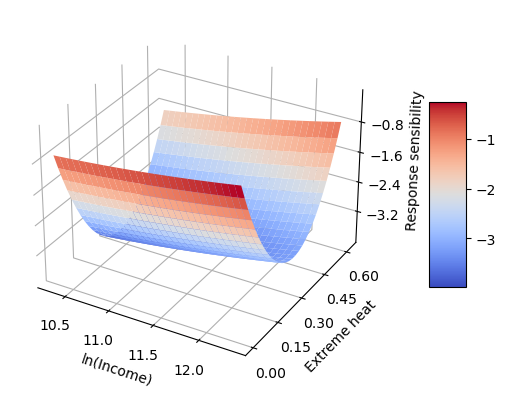

In [26]:
# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(ln_income_grid, mean_heat_grid, coeffs_grid, cmap='coolwarm')

# Labels
ax.set_xlabel('ln(Income)')
ax.set_ylabel('Extreme heat')
ax.set_zlabel('Response sensibility')

# Set background color to white
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Change the number of bins as needed
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Change the number of bins as needed
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

ax.zaxis.set_major_locator(MaxNLocator(nbins=5))  # Change the number of bins as needed
ax.zaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

# Add color bar which maps values to colors
fig.colorbar(surface, shrink=0.5, aspect=5, pad=0.1)

# Save the plot to a PDF file
plt.savefig("C:/Users/zhaiw/Dropbox (Personal)/working paper/Heat_spend/figures/figure4/spend_3d_surface2.pdf", format='pdf')

# Show the plot
plt.show()

In [27]:
# Get the regression model results
X = np.vstack((ln_income, mean_heat)).T
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model using statsmodels
X_poly = sm.add_constant(X_poly)  # Add a constant term for the intercept
model = sm.OLS(coeffs, X_poly).fit()

# Print the summary of the regression
print(model.summary())

# Extract the coefficients, standard error, t-value, and p-value
params = model.params
std_err = model.bse
t_values = model.tvalues
p_values = model.pvalues

print("Coefficients:", params)
print("Standard Errors:", std_err)
print("t-values:", t_values)
print("p-values:", p_values)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1364.
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.17e-183
Time:                        10:57:16   Log-Likelihood:                 70.461
No. Observations:                 264   AIC:                            -128.9
Df Residuals:                     258   BIC:                            -107.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5737      7.716      0.463      0.6

const: Intercept (constant term)
x1: ln_income
x2: mean_heat
x3: (ln_income)^2
x4: (mean_heat)^2
x5: (ln_income) * (mean_heat)

## visit

In [12]:
# Load the data
file_path = "E:/POI_gridmet_daily_weather_data/place_visit_merge_final.csv"
data = pd.read_csv(file_path)

In [13]:
# Extract the necessary columns
ln_income = data['ln_income'].values
mean_heat = data['mean_heat'].values
coeffs = data['coeffs'].values

In [14]:
# Prepare the data for polynomial regression
X = np.vstack((ln_income, mean_heat)).T
y = coeffs

In [15]:
# Define the polynomial regression model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [16]:
# Generate a grid of values for plotting
ln_income_seq = np.linspace(min(ln_income), max(ln_income), 30)
mean_heat_seq = np.linspace(min(mean_heat), max(mean_heat), 30)
ln_income_grid, mean_heat_grid = np.meshgrid(ln_income_seq, mean_heat_seq)

In [17]:
# Predict the coeffs for the grid values
X_grid = np.vstack([ln_income_grid.ravel(), mean_heat_grid.ravel()]).T
coeffs_grid = model.predict(X_grid).reshape(ln_income_grid.shape)

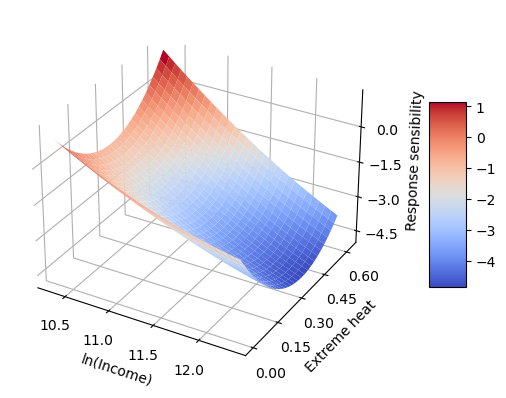

In [18]:
# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(ln_income_grid, mean_heat_grid, coeffs_grid, cmap='coolwarm')

# Labels
ax.set_xlabel('ln(Income)')
ax.set_ylabel('Extreme heat')
ax.set_zlabel('Response sensibility')

# Set background color to white
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Change the number of bins as needed
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Change the number of bins as needed
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

ax.zaxis.set_major_locator(MaxNLocator(nbins=5))  # Change the number of bins as needed
ax.zaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

# Add color bar which maps values to colors
fig.colorbar(surface, shrink=0.5, aspect=5, pad=0.1)

# Save the plot to a PDF file
plt.savefig("C:/Users/zhaiw/Dropbox (Personal)/working paper/Heat_spend/figures/figure4/visit_3d_surface.pdf", format='pdf')

# Show the plot
plt.show()

In [19]:
# Get the regression model results
X = np.vstack((ln_income, mean_heat)).T
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model using statsmodels
X_poly = sm.add_constant(X_poly)  # Add a constant term for the intercept
model = sm.OLS(coeffs, X_poly).fit()

# Print the summary of the regression
print(model.summary())

# Extract the coefficients, standard error, t-value, and p-value
params = model.params
std_err = model.bse
t_values = model.tvalues
p_values = model.pvalues

print("Coefficients:", params)
print("Standard Errors:", std_err)
print("t-values:", t_values)
print("p-values:", p_values)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     311.2
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.90e-107
Time:                        10:56:51   Log-Likelihood:                -127.36
No. Observations:                 264   AIC:                             266.7
Df Residuals:                     258   BIC:                             288.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.4812     16.324      3.644      0.0

const: Intercept (constant term) x1: ln_income x2: mean_heat x3: (ln_income)^2 x4: (mean_heat)^2 x5: (ln_income) * (mean_heat)